def UserForGenre( genero : str ): Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año.
Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}



In [1]:
import pandas as pd

# Ruta a tus archivos CSV
archivo_csv1 = 'gamescompleto.csv'
archivo_csv2 = 'itemscompleto.csv'
archivo_csv3 = 'reviewscompleto.csv'

# Carga de datos desde los archivos CSV en DataFrames
dfgames = pd.read_csv(archivo_csv1)
dfitems = pd.read_csv(archivo_csv2)
dfreviews = pd.read_csv(archivo_csv3)


In [2]:
dfgames.head()
#de aca necesito genero e item id

,publisher,genres,item_name,title,url,release_date,tags,reviews_url,specs,price,early_access,item_id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd


In [3]:
dfgames2 = dfgames[['genres', 'item_id']]


In [4]:
dfgames2.head()

,genres,item_id
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",761140.0
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",643980.0
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",670290.0
3,"['Action', 'Adventure', 'Casual']",767400.0
4,"['Action', 'Adventure', 'Simulation']",772540.0


In [5]:
# eliminamos los corchetes y comillas
dfgames2['genres'] = dfgames2['genres'].str.replace(r"[\[\]']", '', regex=True)

C:\Users\W10\AppData\Local\Temp\ipykernel_11240\1224657353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames2['genres'] = dfgames2['genres'].str.replace(r"[\[\]']", '', regex=True)


In [6]:
dfgames2.head()

,genres,item_id
0,"Action, Casual, Indie, Simulation, Strategy",761140.0
1,"Free to Play, Indie, RPG, Strategy",643980.0
2,"Casual, Free to Play, Indie, Simulation, Sports",670290.0
3,"Action, Adventure, Casual",767400.0
4,"Action, Adventure, Simulation",772540.0


In [7]:
dfgames2.info()

# 1 solo nulo lo sacamos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28852 entries, 0 to 28851
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genres   28852 non-null  object 
 1   item_id  28851 non-null  float64
dtypes: float64(1), object(1)
memory usage: 450.9+ KB


In [8]:
# eliminamos ese nulo y nos pasamos item_id a entero ya que es una columan id y asi tendra mas congruencia  
dfgames2 = dfgames2.dropna(subset=['item_id'])
dfgames2['item_id'] = dfgames2['item_id'].astype(int)


In [9]:
dfgames2.info()
#verificamos

<class 'pandas.core.frame.DataFrame'>
Index: 28851 entries, 0 to 28851
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   genres   28851 non-null  object
 1   item_id  28851 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 563.5+ KB


In [10]:
dfgames2.head()
# Lista esta parte

,genres,item_id
0,"Action, Casual, Indie, Simulation, Strategy",761140
1,"Free to Play, Indie, RPG, Strategy",643980
2,"Casual, Free to Play, Indie, Simulation, Sports",670290
3,"Action, Adventure, Casual",767400
4,"Action, Adventure, Simulation",772540


In [11]:
dfitems.head()
#necesito  user_id item_id item_name y playtime

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0,0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7,0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0,0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0,0


In [12]:
dfitems2 = dfitems[['user_id', 'item_id','item_name','playtime_forever']]

In [13]:
dfitems2.head()

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,js41637,20,Team Fortress Classic,0
2,evcentric,30,Day of Defeat,7
3,Riot-Punch,40,Deathmatch Classic,0
4,doctr,50,Half-Life: Opposing Force,0


In [14]:
dfitems2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           88310 non-null  object
 1   item_id           88310 non-null  int64 
 2   item_name         88310 non-null  object
 3   playtime_forever  88310 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


In [15]:
#Exploremos un poco mas la variable numerica playtime la cual sabemos ademas que esta expresada en minutos
maximovalor= dfitems2['playtime_forever'].max()
minimovalor= dfitems2['playtime_forever'].min()
print(maximovalor)
print(minimovalor)

400827
0


C:\Users\W10\AppData\Local\Temp\ipykernel_11240\3988845975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfitems2['playtime_hours'] = dfitems2['playtime_forever'] / 60  # Dividimos por 60 para obtener horas


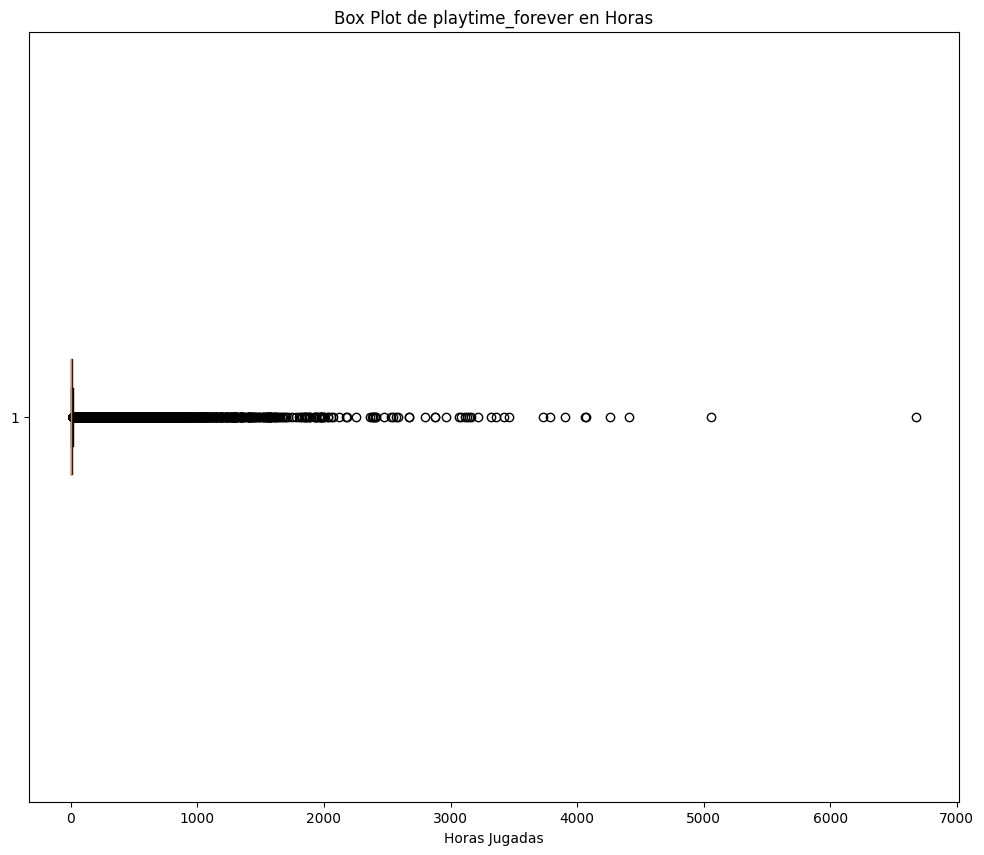

In [16]:
# Veamos un boxplot pero expresado en horas en vez de minutos
import matplotlib.pyplot as plt

dfitems2['playtime_hours'] = dfitems2['playtime_forever'] / 60  # Dividimos por 60 para obtener horas

plt.figure(figsize=(12, 10)) 

plt.boxplot(dfitems2['playtime_hours'], vert=False)


plt.title('Box Plot de playtime_forever en Horas')
plt.xlabel('Horas Jugadas')

plt.show()
# se ve raro vamos a considerar esto para la creacion y correcion de la funcion


In [17]:
dfreviews.head()
# aca usariamos fecha posteo e item id

,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,review
0,NaN,2011-11-05,NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,NaN,2011-07-15,NaN,22200,No ratings yet,True,It's unique and worth a playthrough.
2,NaN,2011-04-21,NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,NaN,2014-06-24,NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,NaN,2013-09-08,NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [18]:
dfreviews2 = dfreviews[['Fecha_posteo', 'item_id']]

In [19]:
dfreviews2.head()

,Fecha_posteo,item_id
0,2011-11-05,1250
1,2011-07-15,22200
2,2011-04-21,43110
3,2014-06-24,251610
4,2013-09-08,227300


In [20]:
dfreviews2.info()
# sin nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49186 entries, 0 to 49185
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Fecha_posteo  49186 non-null  object
 1   item_id       49186 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 768.7+ KB


In [21]:
# Realiza la unión por la columna 'item_id'
dfgamesitems = pd.merge(dfgames2, dfitems2, on='item_id', how='inner')


In [22]:
dfgamesitems.head()

,genres,item_id,user_id,item_name,playtime_forever,playtime_hours
0,"Action, Indie, Racing",282010,Uw0tm8MeaslesVaccines,Carmageddon Max Pack,5,0.083333
1,"Action, Indie, Racing",282010,kelpykelpy,Carmageddon Max Pack,0,0.000000
2,"Action, Indie, Racing",282010,76561198049237610,Carmageddon Max Pack,0,0.000000
3,"Action, Indie, Racing",282010,76561198046186720,Carmageddon Max Pack,0,0.000000
4,"Action, Indie, Racing",282010,76561198091166709,Carmageddon Max Pack,13,0.216667


In [23]:
dfgamesitemsreviews= pd.merge(dfgamesitems, dfreviews2, on='item_id', how='inner')

In [24]:
dfgamesitemsreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8424045 entries, 0 to 8424044
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   genres            object 
 1   item_id           int32  
 2   user_id           object 
 3   item_name         object 
 4   playtime_forever  int64  
 5   playtime_hours    float64
 6   Fecha_posteo      object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 417.8+ MB


In [25]:
dfgamesitemsreviews.head()

,genres,item_id,user_id,item_name,playtime_forever,playtime_hours,Fecha_posteo
0,Action,70,NitemarePK,Half-Life,0,0.0,2015-10-28
1,Action,70,NitemarePK,Half-Life,0,0.0,2011-01-27
2,Action,70,NitemarePK,Half-Life,0,0.0,2014-07-01
3,Action,70,NitemarePK,Half-Life,0,0.0,2013-12-06
4,Action,70,NitemarePK,Half-Life,0,0.0,2013-08-07


In [26]:
# Convertimos la columna a formato datetime
dfgamesitemsreviews['Fecha_posteo'].isnull().sum()
dfgamesitemsreviews['Fecha_posteo'] = pd.to_datetime(dfgamesitemsreviews['Fecha_posteo'])

In [27]:
#veamos bien los datos de las horas jugadas

# Extrae el año de la columna 'Fecha_posteo' y crea una nueva columna 'Año'
dfgamesitemsreviews['Año'] = dfgamesitemsreviews['Fecha_posteo'].dt.year
# Agrupa por año y suma las horas jugadas
horas_por_año = dfgamesitemsreviews.groupby('Año')['playtime_hours'].sum()

# Muestra el resultado
print(horas_por_año)


Año
2010    7.801064e+05
2011    6.377476e+06
2012    2.002517e+07
2013    1.620520e+08
2014    6.038058e+08
2015    6.603777e+08
Name: playtime_hours, dtype: float64


In [28]:
import pandas as pd

# Calcula los cuartiles y el IQR
Q1 = dfgamesitemsreviews['playtime_hours'].quantile(0.25)
Q3 = dfgamesitemsreviews['playtime_hours'].quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra el DataFrame para mantener solo los valores dentro del rango
df_no_outliers = dfgamesitemsreviews[(dfgamesitemsreviews['playtime_hours'] >= lower_bound) & (dfgamesitemsreviews['playtime_hours'] <= upper_bound)]

# df_no_outliers ahora contiene solo las filas sin valores atípicos en la columna 'playtime_hours'



In [29]:
#veamos bien los datos de las horas jugadas ahora que aplicamos la diferencia de quartiles

# Extrae el año de la columna 'Fecha_posteo' y crea una nueva columna 'Año'
df_no_outliers['Año'] = df_no_outliers['Fecha_posteo'].dt.year
# Agrupa por año y suma las horas jugadas
horas_por_año = df_no_outliers.groupby('Año')['playtime_hours'].sum()

# Muestra el resultado
print(horas_por_año)

C:\Users\W10\AppData\Local\Temp\ipykernel_11240\1611409504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Año'] = df_no_outliers['Fecha_posteo'].dt.year


Año
2010    2.294183e+05
2011    2.384491e+06
2012    6.284057e+06
2013    4.402541e+07
2014    1.427225e+08
2015    1.296796e+08
Name: playtime_hours, dtype: float64


C:\Users\W10\AppData\Local\Temp\ipykernel_11240\3730758905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Año'] = df_no_outliers['Fecha_posteo'].dt.year


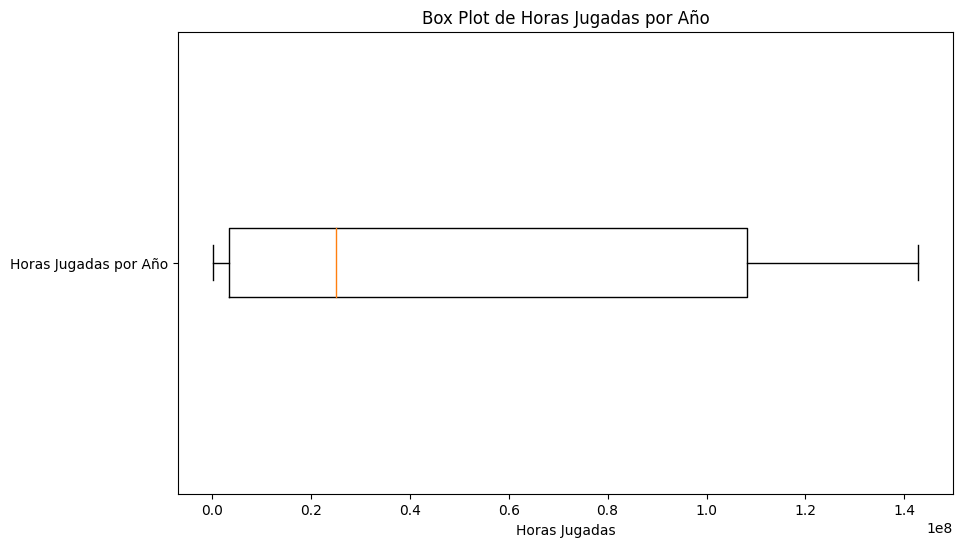

In [30]:
import matplotlib.pyplot as plt

# Veamos bien los datos de las horas jugadas
df_no_outliers['Año'] = df_no_outliers['Fecha_posteo'].dt.year

# Agrupa por año y suma las horas jugadas
horas_por_año = df_no_outliers.groupby('Año')['playtime_hours'].sum()

# Crear un box plot
plt.figure(figsize=(10, 6))
plt.boxplot(horas_por_año, vert=False, labels=['Horas Jugadas por Año'])
plt.title('Box Plot de Horas Jugadas por Año')
plt.xlabel('Horas Jugadas')
plt.show()


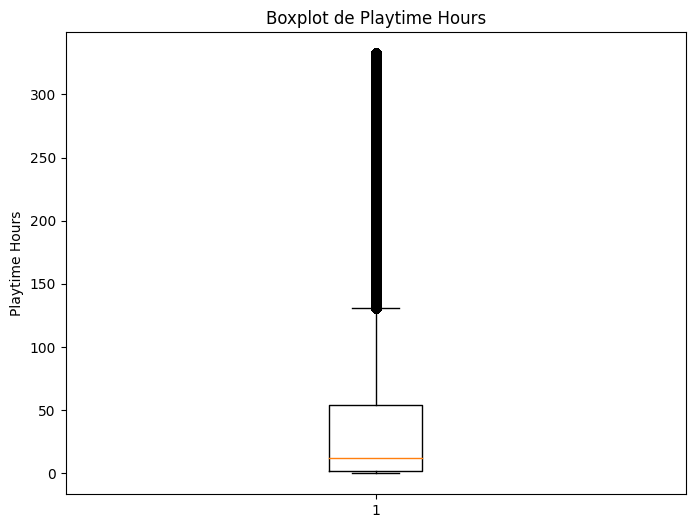

In [31]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['playtime_hours'])
plt.title('Boxplot de Playtime Hours')
plt.ylabel('Playtime Hours')
plt.show()

In [32]:
df_no_outliers
#nuevo df

,genres,item_id,user_id,item_name,playtime_forever,playtime_hours,Fecha_posteo,Año
0,Action,70,NitemarePK,Half-Life,0,0.0,2015-10-28,2015
1,Action,70,NitemarePK,Half-Life,0,0.0,2011-01-27,2011
2,Action,70,NitemarePK,Half-Life,0,0.0,2014-07-01,2014
3,Action,70,NitemarePK,Half-Life,0,0.0,2013-12-06,2013
4,Action,70,NitemarePK,Half-Life,0,0.0,2013-08-07,2013
...,...,...,...,...,...,...,...,...
8424040,Action,80,XxLaughingJackClown77xX,Counter-Strike: Condition Zero,0,0.0,2014-10-26,2014
8424041,Action,80,XxLaughingJackClown77xX,Counter-Strike: Condition Zero,0,0.0,2013-12-08,2013
8424042,Action,80,XxLaughingJackClown77xX,Counter-Strike: Condition Zero,0,0.0,2015-01-05,2015
8424043,Action,80,XxLaughingJackClown77xX,Counter-Strike: Condition Zero,0,0.0,2014-10-31,2014


In [34]:
ceros = (df_no_outliers['playtime_hours'] == 0.0).sum()
print(f"La cantidad de valores iguales a cero en la columna 'playtime_hours' es: {ceros}")


La cantidad de valores iguales a cero en la columna 'playtime_hours' es: 552835


In [35]:
# sacamos las filas con valor 0.0 ya que no nos aportan al objetivo de nuestra funcion
df_filtrado = df_no_outliers[df_no_outliers['playtime_hours'] != 0.0]


In [36]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6584551 entries, 168 to 8424008
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   genres            object        
 1   item_id           int32         
 2   user_id           object        
 3   item_name         object        
 4   playtime_forever  int64         
 5   playtime_hours    float64       
 6   Fecha_posteo      datetime64[ns]
 7   Año               int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 401.9+ MB


In [37]:
df_filtrado.isnull().sum()

genres              0
item_id             0
user_id             0
item_name           0
playtime_forever    0
playtime_hours      0
Fecha_posteo        0
Año                 0
dtype: int64

In [38]:
#columnas a eliminar
columnas_a_eliminar = ['item_id', 'item_name', 'playtime_forever', 'Fecha_posteo']

df_filtrado.drop(columnas_a_eliminar, axis=1, inplace=True)

C:\Users\W10\AppData\Local\Temp\ipykernel_11240\20918578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.drop(columnas_a_eliminar, axis=1, inplace=True)


In [39]:
df_filtrado

,genres,user_id,playtime_hours,Año
168,Action,DingarooEF,1.800000,2015
169,Action,DingarooEF,1.800000,2011
170,Action,DingarooEF,1.800000,2014
171,Action,DingarooEF,1.800000,2013
172,Action,DingarooEF,1.800000,2013
...,...,...,...,...
8424004,Action,qrowid,0.016667,2014
8424005,Action,qrowid,0.016667,2013
8424006,Action,qrowid,0.016667,2015
8424007,Action,qrowid,0.016667,2014


In [40]:
# dejamos la columna de genero toda en minuscula 
df_filtrado['genres'] = df_filtrado['genres'].str.lower()


C:\Users\W10\AppData\Local\Temp\ipykernel_11240\1071815395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['genres'] = df_filtrado['genres'].str.lower()


In [42]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6584551 entries, 168 to 8424008
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   genres          object 
 1   user_id         object 
 2   playtime_hours  float64
 3   Año             int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 226.1+ MB


In [43]:
# Vamos a reducirlo a la mitad por una cuestion de espacio en render 
df_reducido = df_filtrado.sample(frac=0.5, random_state=1)

In [44]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3292276 entries, 289547 to 349386
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   genres          object 
 1   user_id         object 
 2   playtime_hours  float64
 3   Año             int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 113.0+ MB


In [1]:
archivo_salida = 'df_2reducido.parquet'
df_reducido.to_parquet(archivo_salida, index=False)

NameError: name 'df_reducido' is not defined

In [3]:
import pandas as pd

In [4]:
df = pd.read_parquet('df_2reducido.parquet')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292276 entries, 0 to 3292275
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   genres          object 
 1   user_id         object 
 2   playtime_hours  float64
 3   Año             int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 87.9+ MB


In [6]:
# Vamos a tener que reducirlo un poco mas aun
tamano_muestra = 0.5  #50% tomamos

# Tomar una muestra aleatoria del DataFrame
df = df.sample(frac=tamano_muestra, random_state=42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1646138 entries, 2006171 to 2534029
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   genres          1646138 non-null  object 
 1   user_id         1646138 non-null  object 
 2   playtime_hours  1646138 non-null  float64
 3   Año             1646138 non-null  int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 56.5+ MB


In [8]:
archivo_salida = 'df_2reducidov2.parquet'
df.to_parquet(archivo_salida, index=False)

In [9]:
def UserForGenre(genero: str):
    # Filtrar el df por género
    df_genre = df[df['genres'] == genero]

    if df_genre.empty:
        return {"Usuario con más horas jugadas para " + genero: "Ninguno", "Horas jugadas": []}

    df_genre['Año'] = pd.to_datetime(df_genre['Año'], format='%Y')
    # Encontrar el usuario con mas horas jugadas para ese genero
    max_playtime_user = df_genre.loc[df_genre['playtime_hours'].idxmax()]['user_id']

    # Horas jugadas por año
    playtime_by_year = df_genre.groupby(df_genre['Año'].dt.year)['playtime_hours'].sum().reset_index()

    # Crear una lista de diccionarios para la acumulación de horas por año
    playtime_list = [{"Año": year, "Horas": hours} for year, hours in zip(playtime_by_year['Año'], playtime_by_year['playtime_hours'])]

    return {"Usuario con más horas jugadas para " + genero: max_playtime_user, "Horas jugadas": playtime_list}


In [10]:
#probamos
resultado = UserForGenre("action")


C:\Users\W10\AppData\Local\Temp\ipykernel_9264\1092603485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['Año'] = pd.to_datetime(df_genre['Año'], format='%Y')


In [11]:
print(resultado)

{'Usuario con más horas jugadas para action': 'theuglybarnacle', 'Horas jugadas': [{'Año': 2010, 'Horas': 20032.916666666668}, {'Año': 2011, 'Horas': 116847.93333333333}, {'Año': 2012, 'Horas': 487547.6}, {'Año': 2013, 'Horas': 3514076.033333333}, {'Año': 2014, 'Horas': 13449239.666666666}, {'Año': 2015, 'Horas': 17279126.35}]}
